In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

from omegaconf import OmegaConf

from src.utils.visualization import plot_comparison_histogram

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)

In [4]:
# Parse configs
cfg = OmegaConf.load('../config.yaml')

# Prepare paths
raw_data_dir = '..' / pathlib.Path(cfg.paths.data.raw)
raw_file = raw_data_dir / cfg.files.raw_dataset

ANTLR runtime and generated code versions disagree: 4.9.3!=4.8
ANTLR runtime and generated code versions disagree: 4.9.3!=4.8


## Explore the dataset

In [5]:
df = pd.read_csv(
    raw_file, 
    dtype={
        'gkz': 'str',
        'implausible': 'str',
        'pinned': 'str',
        }
    )

In [6]:
df.columns

Index(['open_uuid', 'open_test_uuid', 'time_utc', 'cat_technology',
       'network_type', 'lat', 'long', 'loc_src', 'loc_accuracy', 'gkz',
       'zip_code', 'country_location', 'download_kbit', 'upload_kbit',
       'ping_ms', 'lte_rsrp', 'lte_rsrq', 'server_name', 'test_duration',
       'num_threads', 'platform', 'model', 'client_version', 'network_mcc_mnc',
       'network_name', 'sim_mcc_mnc', 'nat_type', 'asn', 'ip_anonym',
       'ndt_download_kbit', 'ndt_upload_kbit', 'implausible',
       'signal_strength', 'pinned', 'kg_nr', 'gkz_sa', 'land_cover',
       'cell_area_code', 'cell_location_id', 'channel_number', 'radio_band',
       'settlement_type', 'link_id', 'link_name', 'link_distance', 'edge_id',
       'link_frc', 'dtm_level', 'signal_classification'],
      dtype='object')

In [7]:
#pandas_profiling.ProfileReport(
#    df, minimal=True
#)

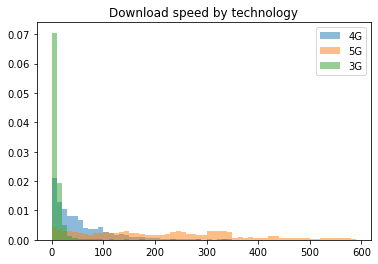

In [8]:
allowed_values = ['3G', '4G', '5G']
filter_ = df.cat_technology.isin(allowed_values)

plot_comparison_histogram(
    df[filter_].download_kbit/1e3,
    df[filter_].cat_technology,
    bins=np.arange(0, 600, 10),
    title='Download speed by technology'
)

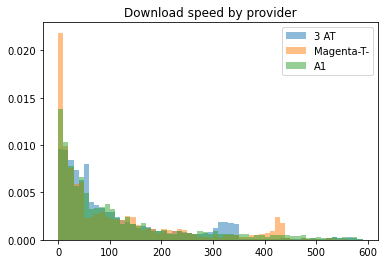

In [9]:
tmp_filter = filter_ & df.network_name.isin(['A1', '3 AT', 'Magenta-T-'])

plot_comparison_histogram(
    df[tmp_filter].download_kbit/1e3,
    df[tmp_filter].network_name,
    bins=np.arange(0, 600, 10),
    title='Download speed by provider'
)

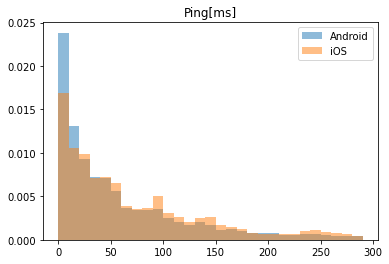

In [10]:
plot_comparison_histogram(
    df[filter_].download_kbit/1e3,
    df[filter_].platform,
    bins=np.arange(0, 300, 10),
    title='Ping[ms]'
)

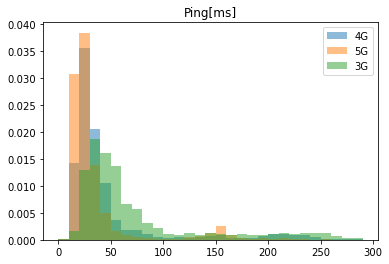

In [11]:
plot_comparison_histogram(
    df[filter_].ping_ms,
    df[filter_].cat_technology,
    bins=np.arange(0, 300, 10),
    title='Ping[ms]'
)

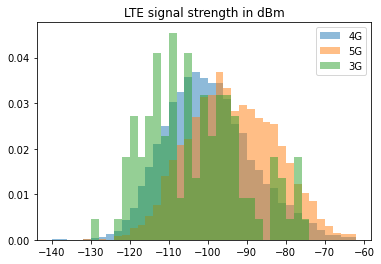

In [12]:
plot_comparison_histogram(
    df[filter_].lte_rsrp,
    df[filter_].cat_technology,
    title='LTE signal strength in dBm',
    bins=np.arange(-140, -60, 2)
)

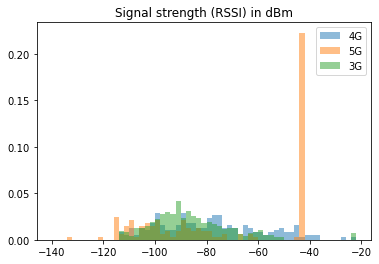

In [13]:
plot_comparison_histogram(
    df[filter_].signal_strength,
    df[filter_].cat_technology,
    title='Signal strength (RSSI) in dBm',
    bins=np.arange(-140, -20, 2)
)

<AxesSubplot:title={'center':'Time of day'}>

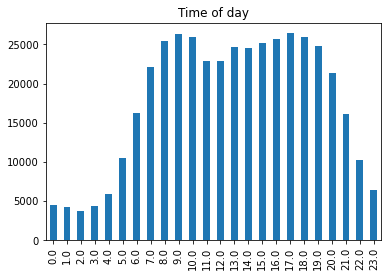

In [14]:
df.time_utc = pd.to_datetime(df.time_utc, errors='coerce')
df['time_hour'] = df.time_utc.dt.hour

df.time_hour.value_counts() \
    .sort_index() \
        .plot(kind='bar', title='Time of day')

In [15]:
df.columns

Index(['open_uuid', 'open_test_uuid', 'time_utc', 'cat_technology',
       'network_type', 'lat', 'long', 'loc_src', 'loc_accuracy', 'gkz',
       'zip_code', 'country_location', 'download_kbit', 'upload_kbit',
       'ping_ms', 'lte_rsrp', 'lte_rsrq', 'server_name', 'test_duration',
       'num_threads', 'platform', 'model', 'client_version', 'network_mcc_mnc',
       'network_name', 'sim_mcc_mnc', 'nat_type', 'asn', 'ip_anonym',
       'ndt_download_kbit', 'ndt_upload_kbit', 'implausible',
       'signal_strength', 'pinned', 'kg_nr', 'gkz_sa', 'land_cover',
       'cell_area_code', 'cell_location_id', 'channel_number', 'radio_band',
       'settlement_type', 'link_id', 'link_name', 'link_distance', 'edge_id',
       'link_frc', 'dtm_level', 'signal_classification', 'time_hour'],
      dtype='object')

In [16]:
df.time_utc

0        2022-02-23 00:00:01
1        2022-02-23 00:00:02
2        2022-02-23 00:00:29
3        2022-02-23 00:00:32
4        2022-02-23 00:00:47
                 ...        
426711   2022-03-26 08:32:07
426712   2022-03-26 08:32:11
426713   2022-03-26 08:32:15
426714   2022-03-26 08:32:18
426715   2022-03-26 08:32:31
Name: time_utc, Length: 426716, dtype: datetime64[ns]

In [17]:
df['daytime_category'] = pd.cut(df.time_hour,range(0,25, 6))

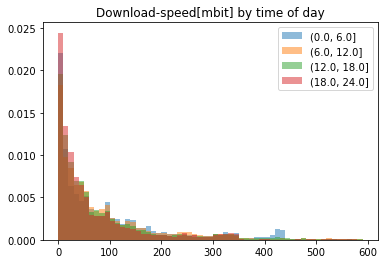

In [18]:
plot_comparison_histogram(
    df[filter_].download_kbit/1e3,
    df[filter_].daytime_category,
    bins=np.arange(0, 600, 10),
    title='Download-speed[mbit] by time of day'
)

<AxesSubplot:xlabel='daytime_category'>

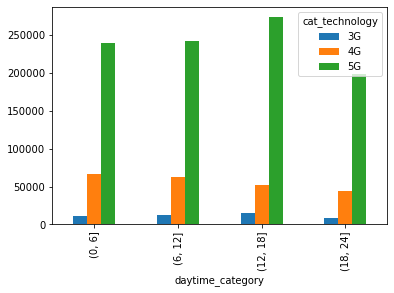

In [19]:
df[filter_] \
    .groupby(['cat_technology', 'daytime_category']) \
        ['download_kbit'].mean().unstack().transpose() \
            .plot(kind='bar')

In [20]:
df.platform.value_counts()

Android    114386
iOS         61445
Name: platform, dtype: int64

In [21]:
df[filter_].daytime_category.value_counts()

(12, 18]    14509
(6, 12]     13978
(18, 24]     5424
(0, 6]       3614
Name: daytime_category, dtype: int64

In [22]:
import pandas as pd

df = pd.read_csv('../data/processed/netztest-opendata-processed.csv')

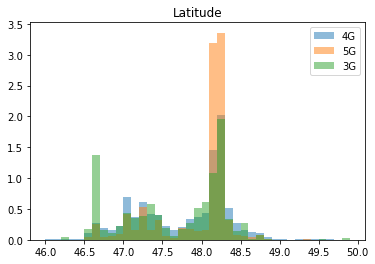

In [23]:
plot_comparison_histogram(
    df.lat,
    df.cat_technology,
    bins=np.arange(46, 50, .1),
    title='Latitude'
)

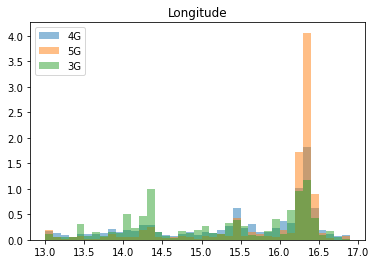

In [24]:
plot_comparison_histogram(
    df.long,
    df.cat_technology,
    bins=np.arange(13, 17, .1),
    title='Longitude'
)

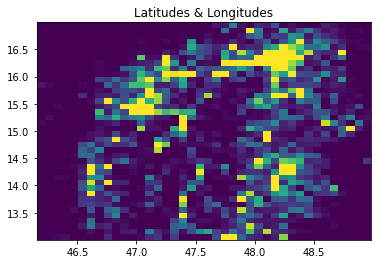

In [25]:
filter_ = (df.lat >= 46) & (df.lat <= 49)
filter_ = filter_ & (df.long >= 13) & (df.long <= 17)

plt.hist2d(df[filter_].lat, df[filter_].long, bins=(40,40), vmax=50)
plt.title('Latitudes & Longitudes')
plt.show()